# Tests notebook

In [3]:
# How many times can I divide 864 x 1296 pixels image by 2 until I no longer have integer dimensions?

def count_divisions(width, height):
    count = 0
    while width % 2 == 0 and height % 2 == 0:
        width //= 2
        height //= 2
        count += 1
    return count

result = count_divisions(864, 1296)
print(result) 

print(864 // (2 ** result), 1296 // (2 ** result))

4
54 81


In [4]:
print(864/1296, 512/1024)

0.6666666666666666 0.5


In [4]:
val_loss_sim = [3.0, 2.9, 2.95, 2.7, 2.3, 2.4, 2.6, 2.8, 3.1, 3.5, 4.0]

# Find the index where the validation loss starts increasing significantly
for i in range(5, len(val_loss_sim)):
    recent_losses = val_loss_sim[i-5:i]
    if all(recent_losses[j] < recent_losses[j+1] * 1.1 for j in range(4)):
        print(f"Early stopping would be triggered at index {i} with validation loss {val_loss_sim[i]}")

Early stopping would be triggered at index 9 with validation loss 3.5
Early stopping would be triggered at index 10 with validation loss 4.0


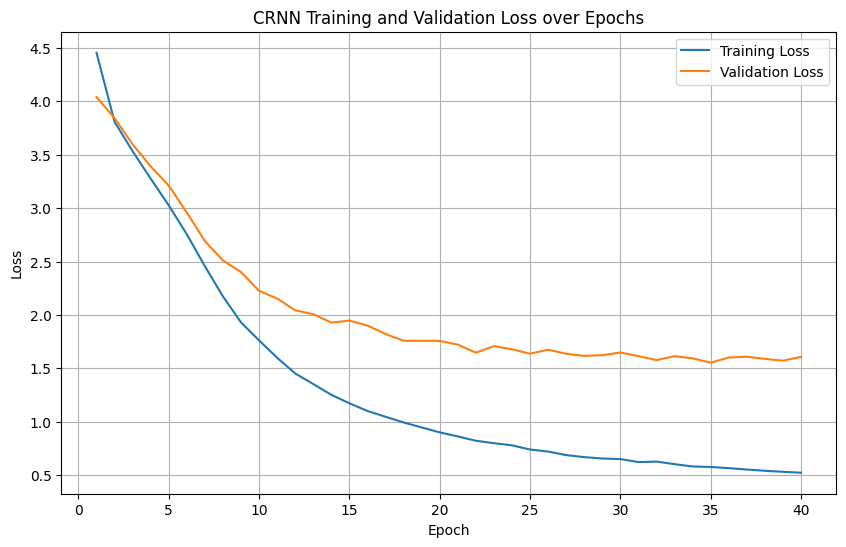

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# read the "training_log.txt" file and extract epoch, train_loss, val_loss
# [2026-01-26 21:06:40.226664] Epoch 40/80 - Train loss: 0.3422
# [2026-01-26 21:06:45.051282] Epoch 40/80 - Validation loss: 1.7005
epochs = []
train_losses = []
val_losses = []

with open("training_log_dropout_tmp.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        if "Train loss" in line:
            parts = line.split(" - ")
            epoch_part = parts[0]
            loss_part = parts[1]
            epoch_num = int(epoch_part.split("Epoch ")[1].split("/")[0])
            train_loss = float(loss_part.split(": ")[1])
            epochs.append(epoch_num)
            train_losses.append(train_loss)
        elif "Validation loss" in line:
            parts = line.split(" - ")
            loss_part = parts[1]
            val_loss = float(loss_part.split(": ")[1])
            val_losses.append(val_loss)
            
# Read the training_log_dropout.txt file and extract epoch, train_loss, val_loss
# Concatenate the data to the existing lists (epoch 0 from training_log_dropout.txt should correspond to the next epoch after the last one in training_log_dropout_tmp.txt)
with open("training_log_dropout.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        if "Train loss" in line:
            parts = line.split(" - ")
            loss_part = parts[1]
            train_loss = float(loss_part.split(": ")[1])
            train_losses.append(train_loss)
        elif "Validation loss" in line:
            parts = line.split(" - ")
            loss_part = parts[1]
            val_loss = float(loss_part.split(": ")[1])
            val_losses.append(val_loss)
# Adjust epochs for the second log file
start_epoch = epochs[-1] + 1
for i in range(len(train_losses) - len(epochs)):
    epochs.append(start_epoch + i)
            
            
            
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.title("CRNN Training and Validation Loss over Epochs")
plt.savefig("reports/figures/training_validation_loss_dropout_1.png")
plt.show()

In [ ]:
# Extract the 

In [38]:
import pandas as pd

# read the "test_receipts_object_amounts_dropout.csv" file
df = pd.read_csv("results/test_receipts_object_amounts_dropout.csv")

# extract all lines where "receipt_filename" == "test_receipt_00027.png"
df_filtered = df[df["receipt_filename"] == "test_receipt_00012.png"]

# display the filtered dataframe nicely
print(df_filtered.to_string(index=False))

      receipt_filename         object  amount
test_receipt_00012.png   mst-tesw UUs  ww0ITA
test_receipt_00012.png    1 8a0,00 0X 120,000
test_receipt_00012.png        1 8B0 o       0
test_receipt_00012.png   TOTAL 2 iter  120,00
test_receipt_00012.png           CCN0 120,000
test_receipt_00012.png Total Kadalian       0


In [35]:
df = pd.read_csv("results/receipts_evaluation_test_dropout.csv")

# extract all lines where "receipt_filename" == "test_receipt_00027.png"
df_filtered = df[df["receipt_filename"] == "test_receipt_00000.png"]

# display the filtered dataframe nicely
# set full display option
pd.set_option('display.max_columns', None)
print(df_filtered.to_string(index=False))

      receipt_filename ground_truth prediction      cer  word_accuracy
test_receipt_00000.png          TAX        TAX 0.000000            1.0
test_receipt_00000.png        5.455       5.45 0.200000            0.0
test_receipt_00000.png        TOTAL      TOTAL 0.000000            1.0
test_receipt_00000.png       60.000     60.000 0.000000            1.0
test_receipt_00000.png         (Qty       ctou 1.000000            0.0
test_receipt_00000.png         2.00       2.00 0.000000            1.0
test_receipt_00000.png          EDC        EDC 0.000000            1.0
test_receipt_00000.png         CIMB       C1NB 0.500000            0.0
test_receipt_00000.png        NIAGA      NIAGA 0.000000            1.0
test_receipt_00000.png          No:       MNo: 0.333333            0.0
test_receipt_00000.png       xx7730        730 0.500000            0.0
test_receipt_00000.png       60.000     60.000 0.000000            1.0
test_receipt_00000.png       901016          1 0.833333            0.0
test_r

In [37]:
# compute average cer and word accuracy (columns "cer" and "word_accuracy") on the filtered dataframe
avg_cer = df_filtered["cer"].mean()
avg_word_accuracy = df_filtered["word_accuracy"].mean()
print(f"Average CER: {avg_cer}")
print(f"Average Word Accuracy: {avg_word_accuracy}")

Average CER: 0.3972222222222222
Average Word Accuracy: 0.4583333333333333
